In [2]:
from dlsite_analyzer.config import RAW_JSON_DATA_DIR
from dlsite_analyzer import (
    initialize_database,
    fetch_and_save_voice_works,
    import_voice_works_to_db,
)

In [3]:
# データベースにテーブルが存在しない場合は初期化する
initialize_database()

2024-11-10 03:26:57 INFO     dlsite_analyzer Database initialized successfully.


In [ ]:
# ボイス作品のデータをJSONファイルに保存
fetch_and_save_voice_works(RAW_JSON_DATA_DIR)

2024-11-08 19:00:31 INFO     dlsite_analyzer Total pages to process: 545
100%|██████████| 545/545 [43:58<00:00,  4.84s/it]
2024-11-08 19:44:30 INFO     dlsite_analyzer Finished saving voice works to JSON files.


In [4]:
# JSONファイルからデータベースにデータをインポート
import_voice_works_to_db(RAW_JSON_DATA_DIR)

Importing JSON to DB: 100%|██████████| 545/545 [00:01<00:00, 291.36it/s]
2024-11-10 03:27:01 INFO     dlsite_analyzer All JSON data imported to the database.


# ワードクラウドの作成

In [ ]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from itertools import chain
from pathlib import Path

from dlsite_analyzer.config import DATABASE_PATH
from dlsite_analyzer.database.constants import (
    VOICE_WORKS_TITLE,
    VOICE_WORKS_VIEW_AGE_RATING
)
from dlsite_analyzer.database import (
    DatabaseManager,
    VoiceWorksViewManager,
)
from dlsite_analyzer import (
    extract_words,
    generate_wordcloud,
    plot_wordcloud
)

wordcloud_folder = Path('./data/wordcloud')

In [2]:
with DatabaseManager(DATABASE_PATH) as db:
    voice_works_view_manager = VoiceWorksViewManager(db)
    df = voice_works_view_manager.get_all_voice_works()

In [3]:
df_all_ages = df[df[VOICE_WORKS_VIEW_AGE_RATING] == "全年齢"] # 全年齢作品のみ抽出
df_r18 = df[df[VOICE_WORKS_VIEW_AGE_RATING] == "R-18"] # R-18の作品のみ抽出
df_r15 = df[df[VOICE_WORKS_VIEW_AGE_RATING] == "R-15"] # R-15の作品のみ抽出

# 単語の抽出
stop_words = []
all_titles_word_list = extract_words(list(df[VOICE_WORKS_TITLE]), stop_words=stop_words)
all_ages_titles_word_list = extract_words(list(df_all_ages[VOICE_WORKS_TITLE]), stop_words=stop_words)
r18_titles_word_list = extract_words(list(df_r18[VOICE_WORKS_TITLE]), stop_words=stop_words)
r15_titles_word_list = extract_words(list(df_r15[VOICE_WORKS_TITLE]), stop_words=stop_words)

100%|██████████| 1138/1138 [00:00<00:00, 26110.58it/s]


In [4]:
# 単語のリストを作成
all_titles_word_list = list(chain.from_iterable(all_titles_word_list))
all_ages_titles_word_list = list(chain.from_iterable(all_ages_titles_word_list))
r18_titles_word_list = list(chain.from_iterable(r18_titles_word_list))
r15_titles_word_list = list(chain.from_iterable(r15_titles_word_list))

In [5]:
# 単語の出現回数をカウント
all_titles_word_count = pd.Series(all_titles_word_list).value_counts()
all_ages_titles_word_count = pd.Series(all_ages_titles_word_list).value_counts()
r18_titles_word_count = pd.Series(r18_titles_word_list).value_counts()
r15_titles_word_count = pd.Series(r15_titles_word_list).value_counts()

In [7]:
# ワードクラウドの作成
font_path = str(wordcloud_folder / 'ipaexg.ttf')
wc_all = generate_wordcloud(all_titles_word_count, font_path=font_path)
wc_all_ages = generate_wordcloud(all_ages_titles_word_count, font_path=font_path)
wc_r18 = generate_wordcloud(r18_titles_word_count, font_path=font_path)
wc_r15 = generate_wordcloud(r15_titles_word_count, font_path=font_path)

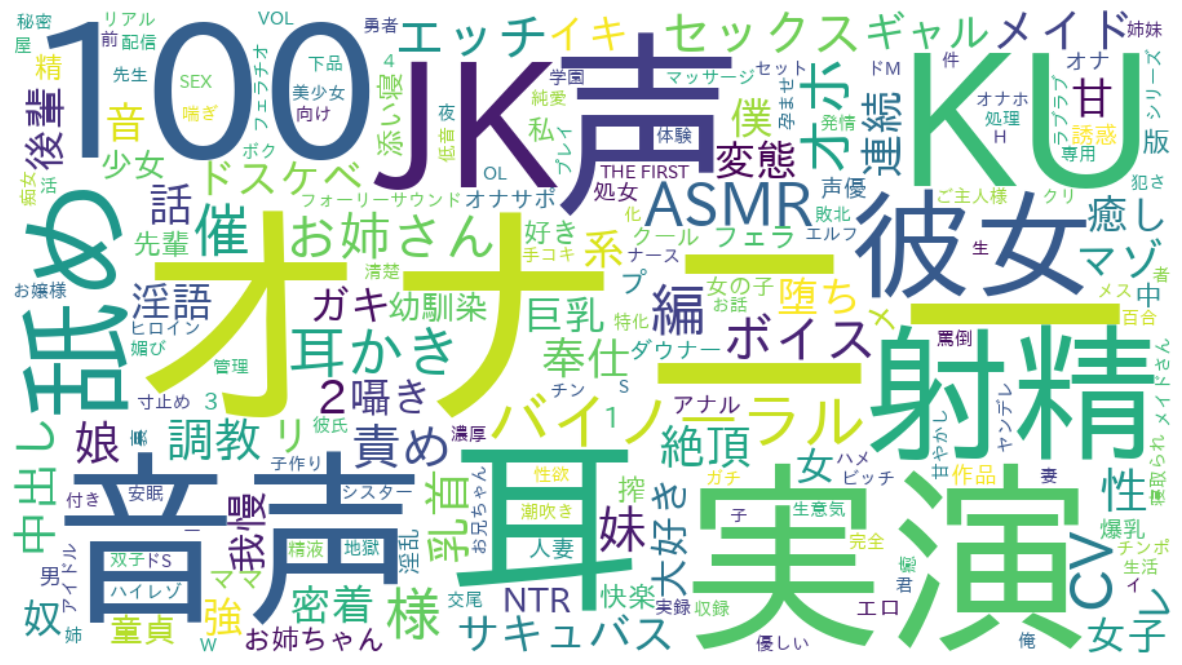

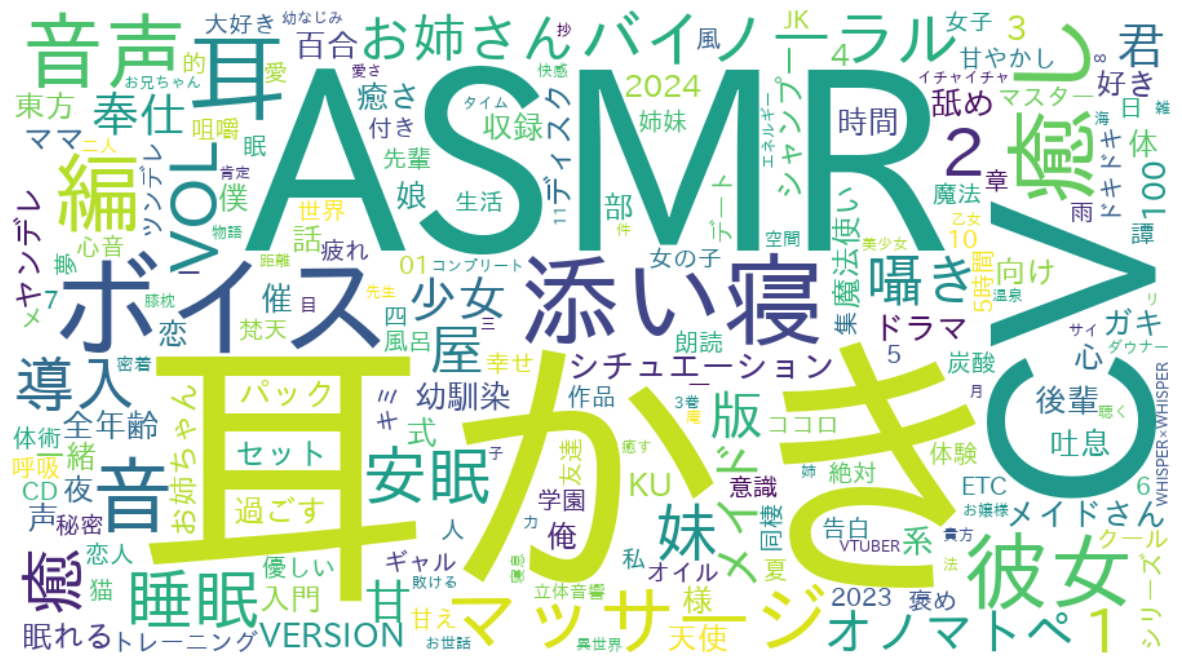

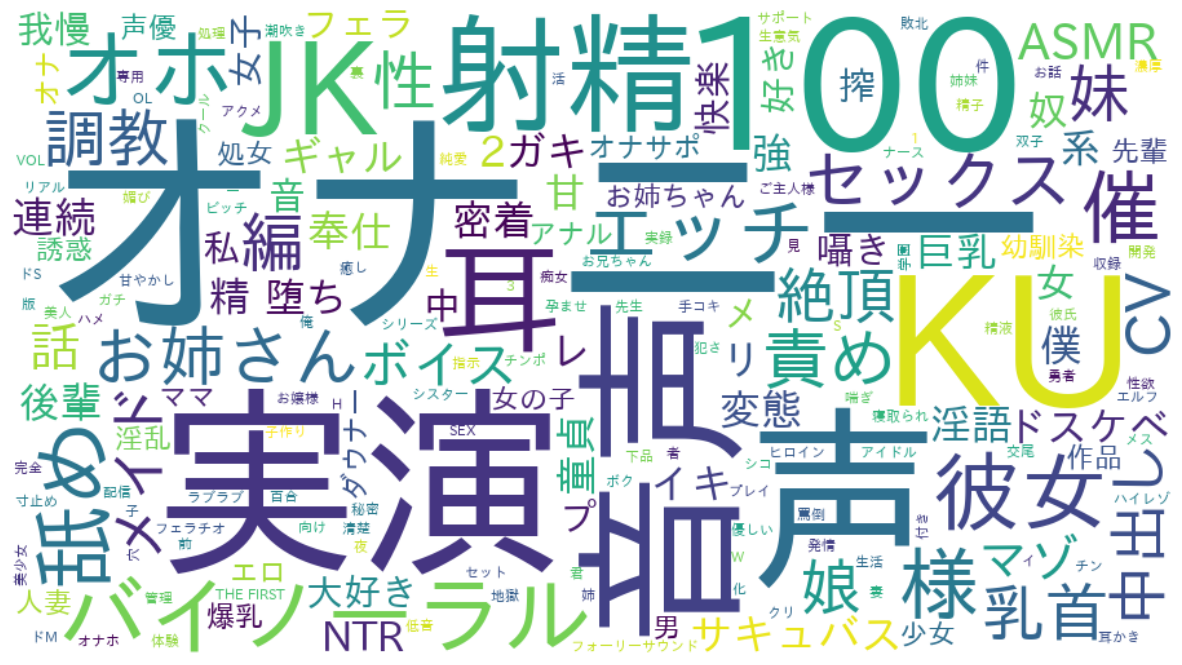

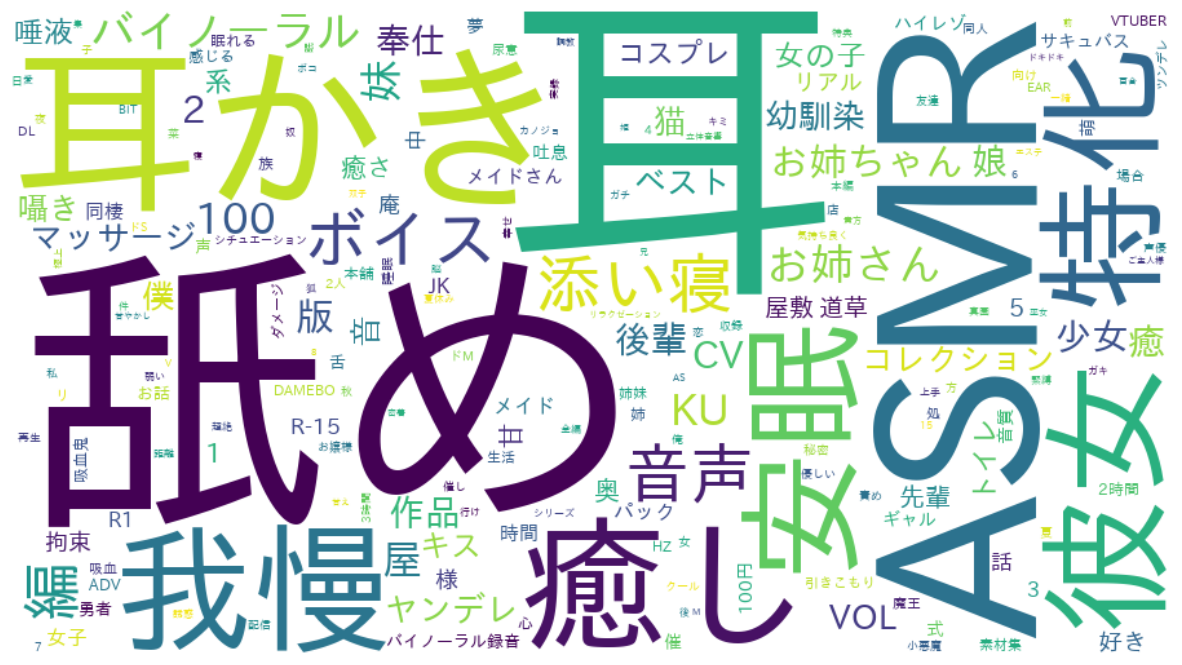

In [8]:
# ワードクラウドの表示
plot_wordcloud(wc_all, figsize=(15, 12), filename=wordcloud_folder / "wordcloud_all.png")
plot_wordcloud(wc_all_ages, figsize=(15, 12), filename=wordcloud_folder / "wordcloud_all_ages.png")
plot_wordcloud(wc_r18, figsize=(15, 12), filename=wordcloud_folder / "wordcloud_r18.png")
plot_wordcloud(wc_r15, figsize=(15, 12), filename=wordcloud_folder / "wordcloud_r15.png")